In [2]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
nltk.download('all')

lemma = nltk.wordnet.WordNetLemmatizer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]    | Do

[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nps_chat.zip.
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\opinion_lexicon.zip.
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Unzipping corpora\verbnet3.zip.
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\webtext.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\word2vec_sample.zip.
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\wordnet2022.zip.
[nltk_data]    | Downloading package wordnet3

In [1]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [ ]:
req1 = requests.get('https://www.edmunds.com/')

In [ ]:
soup1 = BeautifulSoup(req1.content,'html.parser')

In [ ]:
contentBlock1 = soup1.find_all('h3',class_='comp mntl-sc-block money-sc-block-subheading mntl-sc-block-subheading')
contentBlock1

[<h3 class="comp mntl-sc-block money-sc-block-subheading mntl-sc-block-subheading" id="mntl-sc-block_1-0-25"> <span class="mntl-sc-block-subheading__text"> 1. Tell me about how you worked effectively under pressure. </span> </h3>,
 <h3 class="comp mntl-sc-block money-sc-block-subheading mntl-sc-block-subheading" id="mntl-sc-block_1-0-29"> <span class="mntl-sc-block-subheading__text"> 2. How do you handle a challenge? Give an example. </span> </h3>,
 <h3 class="comp mntl-sc-block money-sc-block-subheading mntl-sc-block-subheading" id="mntl-sc-block_1-0-33"> <span class="mntl-sc-block-subheading__text"> 3. Have you ever made a mistake? How did you handle it?  </span> </h3>,
 <h3 class="comp mntl-sc-block money-sc-block-subheading mntl-sc-block-subheading" id="mntl-sc-block_1-0-38"> <span class="mntl-sc-block-subheading__text"> 4. Give an example of how you set goals.  </span> </h3>,
 <h3 class="comp mntl-sc-block money-sc-block-subheading mntl-sc-block-subheading" id="mntl-sc-block_1-0-4

In [ ]:
contentBlock2 = soup1.find_all('ul',class_='comp mntl-sc-block mntl-sc-block-html')
contentBlock2

[<ul class="comp mntl-sc-block mntl-sc-block-html" id="mntl-sc-block_1-0-69">
 <li>Have you worked on multiple projects? How did you prioritize?</li><li>How do you handle meeting tight deadlines?</li><li>How do you handle it when your schedule is interrupted?</li><li>What do you do if you disagree with a co-worker?</li><li>Give me an example of when you did or when you didn't listen.</li><li>What do you do if you disagree with your boss?</li><li>How do you handle it when there's a conflict among team members?</li><li>What is your most important career accomplishment? Why?</li>
 </ul>]

In [ ]:
for cont in contentBlock1:
  cont = str(cont)

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [2]:
import pandas as pd

In [3]:
Interviewdf = pd.read_csv('/content/data.csv')
Interviewdf.head()

,Category,Questions,Answers
0,Linear Regression,What are the assumptions required for linear r...,There are four assumptions associated with a l...
1,Statistics,What is collinearity? What is multicollinearit...,Collinearity is a linear association between t...
2,Linear Regression,What are the drawbacks of a linear model?\n,There are a couple of drawbacks of a linear mo...
3,Linear Regression,What are ridge and lasso regression and what a...,Both L1 and L2 regularization are methods used...
4,KNN,How does K-Nearest Neighbor work?,K-Nearest Neighbors is a classification techni...


In [4]:
Interviewdf.dtypes

Category     object
Questions    object
Answers      object
dtype: object

In [7]:
# text = Interviewdf['Questions'].values
textQuestion = ""
textAnswer = ""
for i,row in Interviewdf.iterrows():
    textQuestion += " " + row['Questions']
    textAnswer += " " + row['Answers']

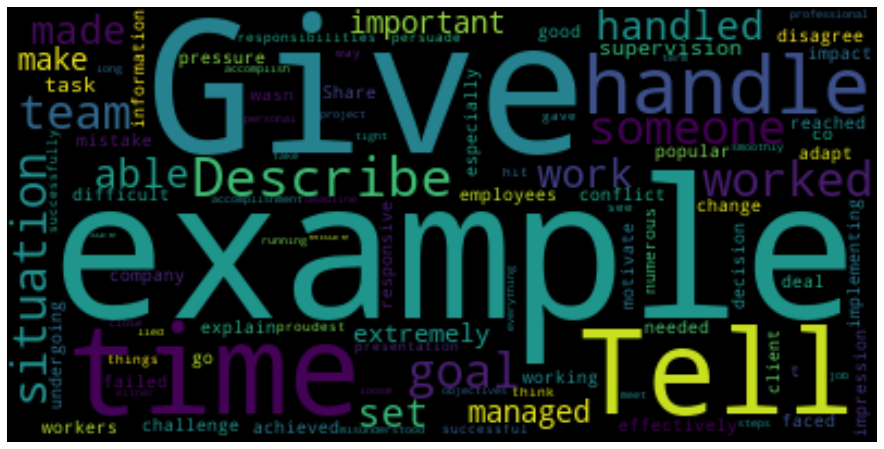

In [ ]:
wordcloudQuestions = WordCloud(colormap = 'viridis_r',stopwords = STOPWORDS).generate(str(textQuestion))

plt.figure(figsize=(30,8))
plt.imshow(wordcloudQuestions, interpolation='bilinear')
plt.axis("off")
plt.show()

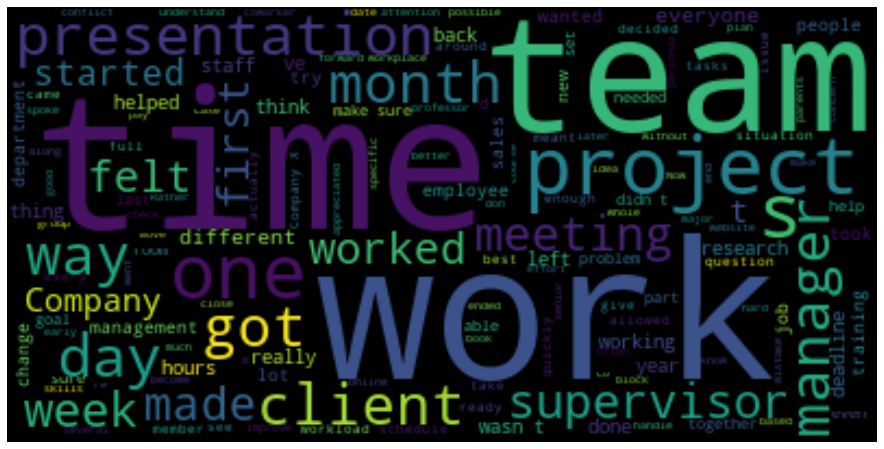

In [ ]:
wordcloudAnswers = WordCloud(colormap = 'viridis_r',stopwords = STOPWORDS).generate(str(textAnswer))

plt.figure(figsize=(30,8))
plt.imshow(wordcloudAnswers, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
stop_words = set(stopwords.words("english"))

#create function to get a DataFrame
def get_df(input_text):
    list_words = input_text.split(' ')
    set_words_full = list(set(list_words))

    for text in set_words_full:

      # Case lowering 
      text = text.lower()
      # Replacing all special characters including numbers
      text = re.sub('[^A-Za-z]+',' ', text)
      # Tokenizing text into word list
      text = nltk.word_tokenize(text)
      # Removing stop words
      text = [word for word in text if word not in stop_words]
      # WordNet lemmatizing each tokenized word 
      text = [lemma.lemmatize(word) for word in text]

    #count each word
    count_words = [list_words.count(i) for i in set_words_full]
    
    #create DataFrame
    df = pd.DataFrame(zip(set_words_full, count_words), columns=['words','count'])
    df.sort_values('count', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

#create function to get a color dictionary
def get_colordict(palette,number,start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d 

In [28]:
df_wordsQuestion = get_df(textQuestion)
df_wordsQuestion.head(10)

,words,count
0,What,163
1,you,158
2,the,149
3,a,142
4,is,134
5,How,96
6,and,82
7,of,82
8,to,76
9,are,73


In [29]:
df_wordsAnswer = get_df(textAnswer)
df_wordsAnswer.head(10)

,words,count
0,the,1595
1,of,859
2,a,797
3,to,756
4,is,587
5,and,544
6,in,316
7,that,313
8,are,214
9,for,203


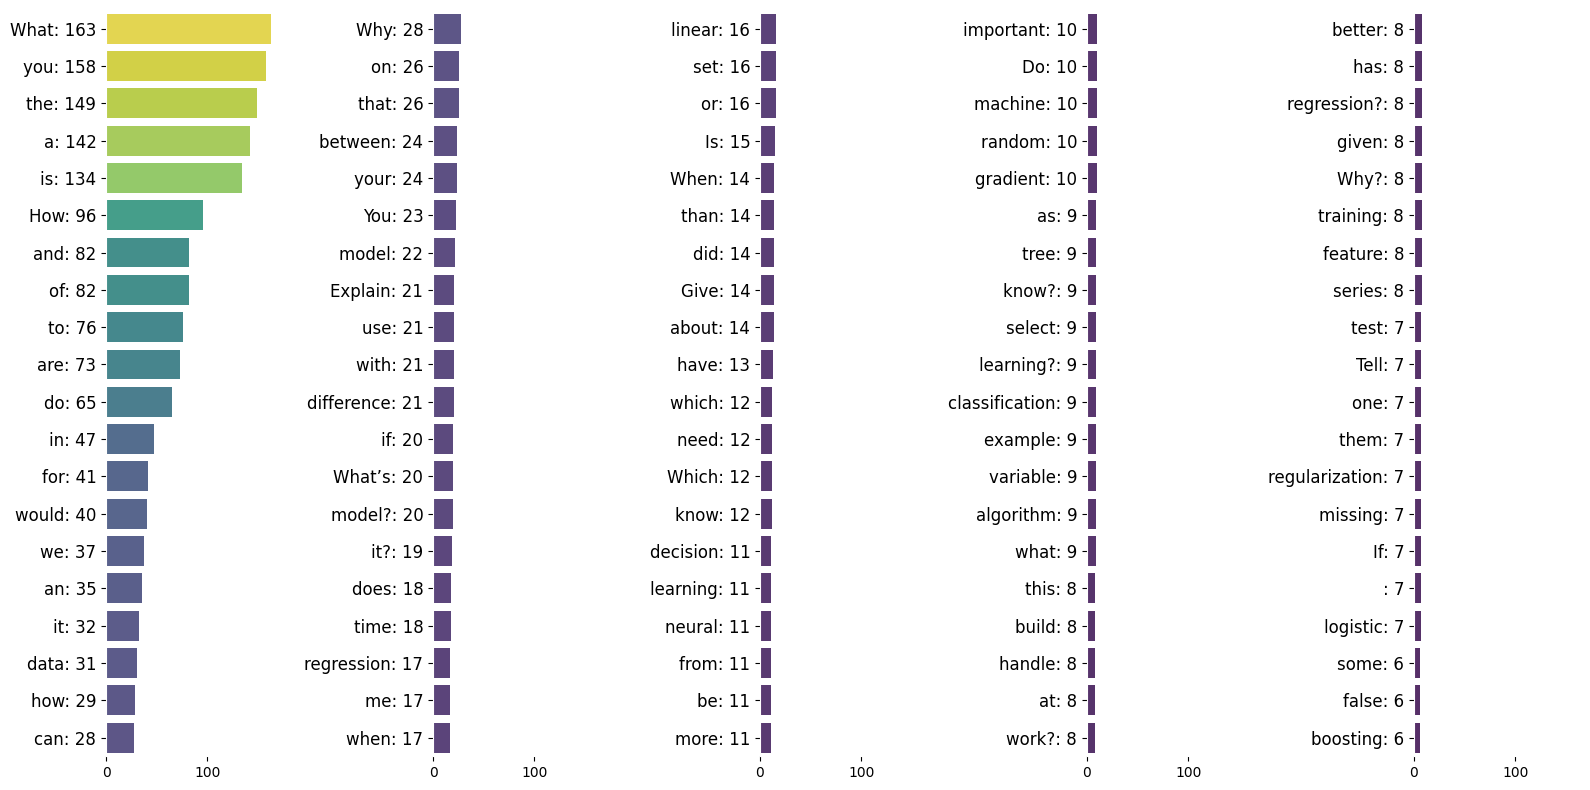

In [30]:
#create index list for slicing
index_list = [[i[0],i[-1]+1] for i in np.array_split(range(100), 5)]

n = df_wordsQuestion['count'].max()
color_dict = get_colordict('viridis', n, 1)

fig, axs = plt.subplots(1, 5, figsize=(16,8), facecolor='white', squeeze=False)
for col, idx in zip(range(0,5), index_list):
    df = df_wordsQuestion[idx[0]:idx[-1]]
    label = [w + ': ' + str(n) for w,n in zip(df['words'],df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0,20))
    
    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient = 'h',
                ax = axs[0][col], palette = color_l)
    axs[0][col].set_xlim(0,n+1)                     #set X axis range max
    axs[0][col].set_yticklabels(label, fontsize=12)
    axs[0][col].spines['bottom'].set_color('white')
    axs[0][col].spines['right'].set_color('white')
    axs[0][col].spines['top'].set_color('white')
    axs[0][col].spines['left'].set_color('white')
            
plt.tight_layout()    
plt.show()

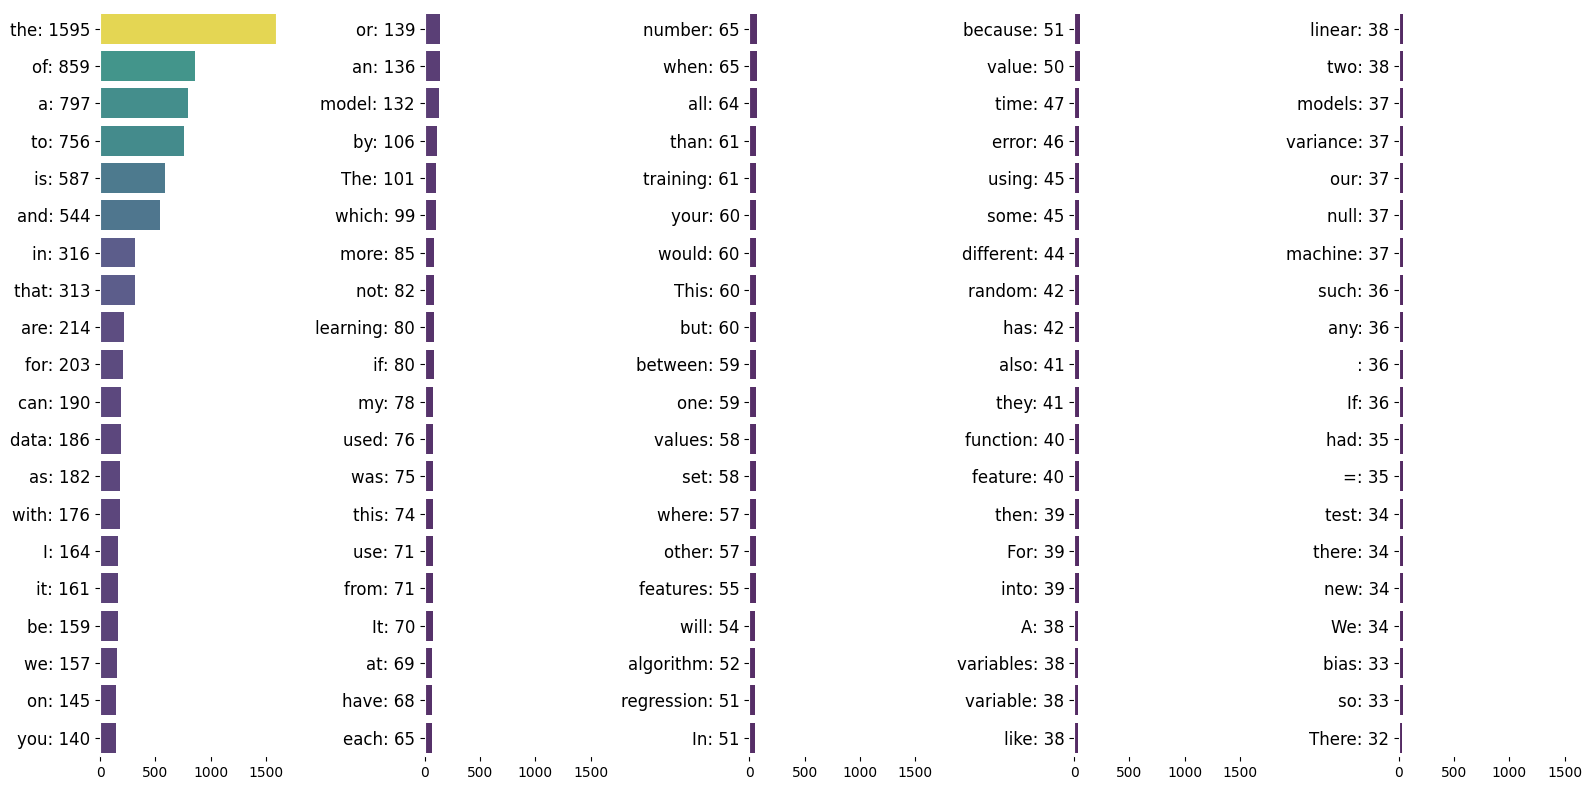

In [31]:
#create index list for slicing
index_list = [[i[0],i[-1]+1] for i in np.array_split(range(100), 5)]

n = df_wordsAnswer['count'].max()
color_dict = get_colordict('viridis', n, 1)

fig, axs = plt.subplots(1, 5, figsize=(16,8), facecolor='white', squeeze=False)
for col, idx in zip(range(0,5), index_list):
    df = df_wordsAnswer[idx[0]:idx[-1]]
    label = [w + ': ' + str(n) for w,n in zip(df['words'],df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0,20))
    
    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient = 'h',
                ax = axs[0][col], palette = color_l)
    axs[0][col].set_xlim(0,n+1)                     #set X axis range max
    axs[0][col].set_yticklabels(label, fontsize=12)
    axs[0][col].spines['bottom'].set_color('white')
    axs[0][col].spines['right'].set_color('white')
    axs[0][col].spines['top'].set_color('white')
    axs[0][col].spines['left'].set_color('white')
            
plt.tight_layout()    
plt.show()